In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("data.csv")

In [3]:
data.head()

,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50
3,23.68,3.31
4,24.59,3.61


In [4]:
data.describe()

,total_bill,tip
count,244.000000,244.000000
mean,19.785943,2.998279
std,8.902412,1.383638
min,3.070000,1.000000
25%,13.347500,2.000000
50%,17.795000,2.900000
75%,24.127500,3.562500
max,50.810000,10.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
dtypes: float64(2)
memory usage: 3.9 KB


In [6]:
data.isnull().values.any()

False

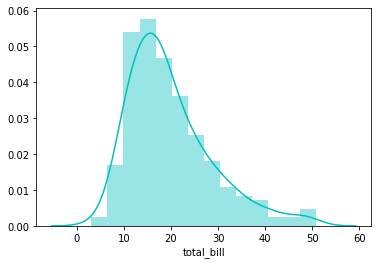

In [7]:
sns.distplot(data["total_bill"], color ='c')

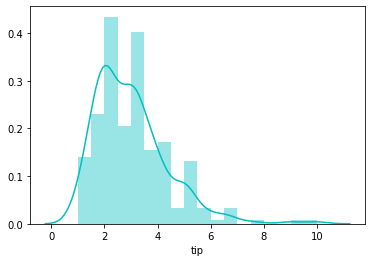

In [8]:
sns.distplot(data["tip"], color ='c')

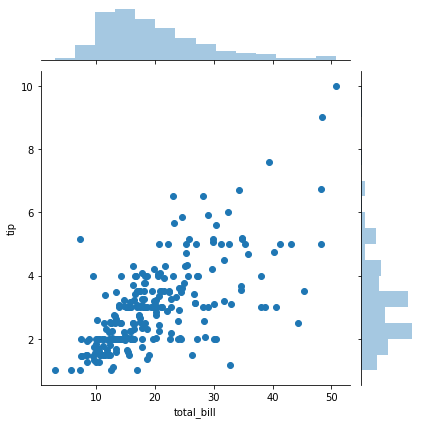

In [9]:
sns.jointplot(x="total_bill", y="tip", data=data, kind='scatter')

In [10]:
x = data.iloc[:, :].values

In [11]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x = sc_X.fit_transform(x)

In [ ]:
# KMeans Clustering Model

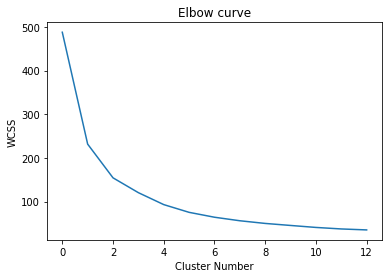

In [12]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,14):
    kmean = KMeans(n_clusters = i , random_state = 0)
    kmean.fit(x)
    wcss.append(kmean.inertia_)
plt.plot(range(0,13), wcss)
plt.title("Elbow curve")
plt.xlabel("Cluster Number")
plt.ylabel("WCSS")
plt.show()

In [13]:
#Fitting the model
kmean = KMeans(n_clusters = 4, random_state = 0)
k_mean_clustering = kmean.fit_predict(x)

In [14]:
k_mean_clustering

array([1, 1, 3, 3, 3, 3, 1, 0, 1, 3, 1, 2, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3,
       1, 2, 3, 1, 1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 1, 2, 1, 3, 3, 1,
       2, 3, 3, 2, 0, 3, 1, 1, 2, 1, 3, 3, 0, 0, 1, 2, 3, 1, 1, 3, 3, 3,
       1, 1, 1, 1, 1, 3, 0, 2, 1, 1, 3, 0, 3, 3, 3, 3, 1, 2, 1, 2, 1, 3,
       2, 3, 0, 3, 1, 3, 3, 2, 0, 1, 3, 1, 1, 3, 0, 3, 3, 1, 3, 3, 3, 3,
       3, 1, 0, 3, 3, 3, 2, 1, 1, 3, 1, 1, 1, 1, 1, 0, 1, 1, 1, 3, 1, 3,
       1, 1, 3, 1, 1, 1, 1, 1, 3, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0,
       1, 2, 2, 3, 1, 1, 3, 1, 1, 1, 3, 3, 3, 2, 1, 1, 2, 3, 3, 0, 3, 0,
       1, 1, 3, 0, 0, 2, 0, 2, 0, 3, 3, 0, 3, 3, 1, 3, 0, 1, 3, 1, 1, 2,
       1, 1, 3, 1, 1, 1, 3, 3, 0, 0, 0, 1, 0, 2, 2, 1, 2, 1, 0, 1, 1, 0,
       1, 3, 1, 3, 1, 1, 1, 3, 1, 3, 0, 3, 3, 1, 3, 1, 1, 0, 2, 2, 0, 3,
       1, 3])

Text(0.5, 1.0, 'Total_bill VS Tips \n Within Cluster Sum of Squares(WCSS)')

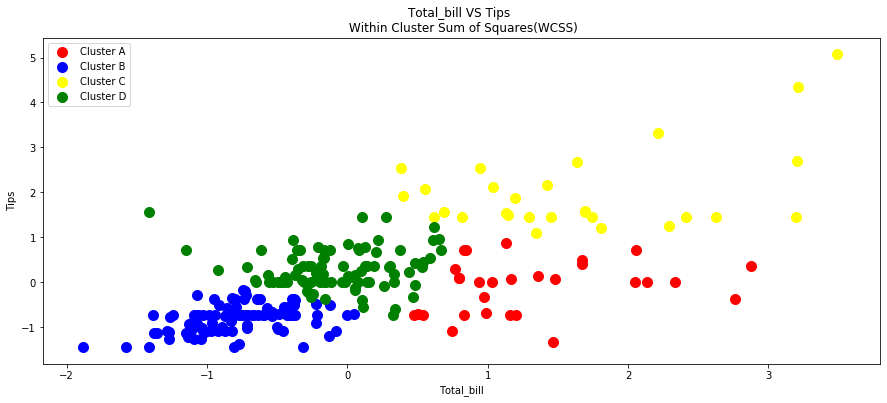

In [29]:
#Graph
plt.figure(figsize =(15,6))
plt.scatter(x[k_mean_clustering == 0, 0], x[k_mean_clustering == 0, 1], s = 100, c = "red", label = "Cluster A")
plt.scatter(x[k_mean_clustering == 1, 0], x[k_mean_clustering == 1, 1], s = 100, c = "blue", label = "Cluster B")
plt.scatter(x[k_mean_clustering == 2, 0], x[k_mean_clustering == 2, 1], s = 100, c = "yellow", label = "Cluster C")
plt.scatter(x[k_mean_clustering == 3, 0], x[k_mean_clustering == 3, 1], s = 100, c = "green", label = "Cluster D")
plt.legend()
plt.xlabel("Total_bill")
plt.ylabel("Tips")
plt.title("Total_bill VS Tips \n Within Cluster Sum of Squares(WCSS)")

In [ ]:
# Hierarical Clustering 
# Agglomerative Method - Combining

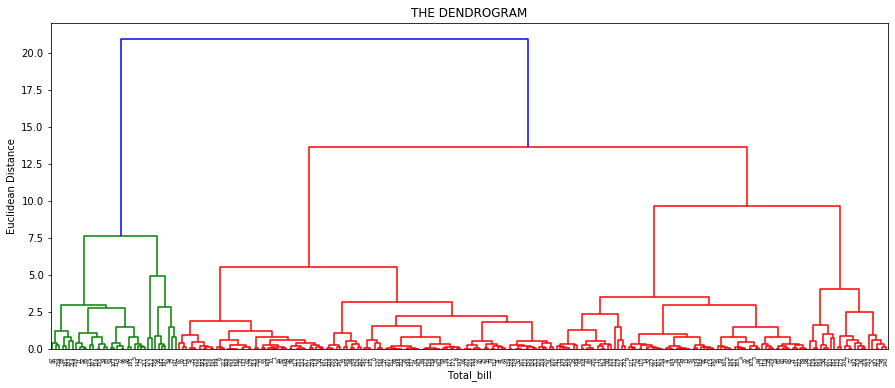

In [24]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize = (15, 6))
dendrogram = sch.dendrogram(sch.linkage(x, method = "ward"))
plt.title("THE DENDROGRAM")
plt.xlabel("Total_bill")
plt.ylabel("Euclidean Distance")
plt.show()

In [ ]:
#Fitting the Hierarical Model

In [26]:
from sklearn.cluster import AgglomerativeClustering
hcluster = AgglomerativeClustering(n_clusters= 4, affinity = "euclidean", linkage = "ward" )
y_clustering = hcluster.fit_predict(x)

In [27]:
y_clustering

array([2, 2, 3, 3, 3, 0, 2, 1, 2, 3, 2, 0, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3,
       2, 0, 3, 2, 2, 2, 3, 3, 2, 2, 3, 2, 3, 3, 2, 3, 2, 0, 2, 2, 3, 2,
       0, 3, 0, 0, 1, 3, 2, 2, 0, 2, 0, 3, 1, 1, 2, 0, 3, 2, 2, 3, 2, 3,
       2, 2, 2, 2, 2, 3, 1, 0, 2, 2, 3, 0, 3, 2, 3, 3, 2, 0, 2, 0, 2, 3,
       0, 3, 1, 3, 2, 3, 3, 0, 0, 2, 3, 2, 2, 3, 1, 3, 3, 2, 3, 0, 3, 3,
       3, 2, 1, 3, 0, 3, 0, 2, 2, 3, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 3,
       2, 2, 3, 2, 2, 2, 2, 2, 3, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 3, 2, 2, 3, 2, 2, 2, 3, 3, 2, 0, 2, 2, 0, 3, 3, 1, 3, 1,
       2, 2, 3, 1, 1, 0, 1, 0, 1, 0, 3, 1, 3, 3, 2, 3, 1, 2, 3, 2, 2, 0,
       2, 2, 3, 2, 2, 2, 3, 3, 1, 1, 2, 2, 1, 0, 0, 2, 0, 2, 1, 2, 2, 1,
       2, 3, 2, 3, 2, 2, 2, 3, 2, 3, 2, 3, 3, 2, 3, 2, 2, 1, 0, 0, 1, 2,
       2, 3], dtype=int64)

Text(0.5, 1.0, 'Total_bill VS Tips \n Dendrogram')

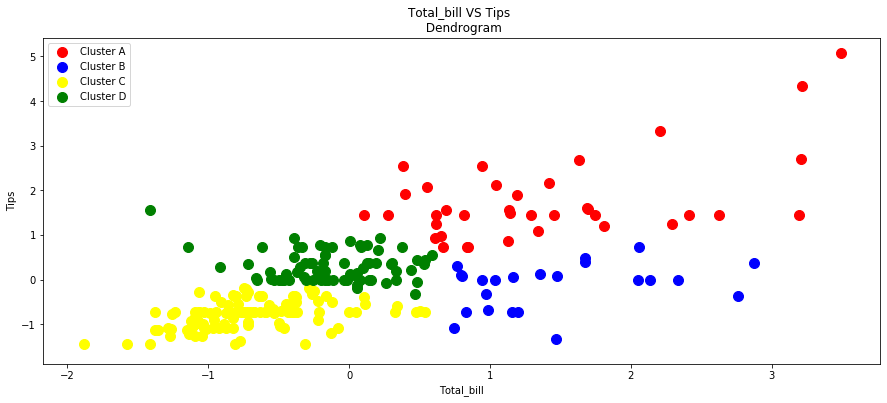

In [30]:
#Graph
plt.figure(figsize =(15,6))
plt.scatter(x[y_clustering == 0, 0], x[y_clustering == 0, 1], s = 100, c = "red", label = "Cluster A")
plt.scatter(x[y_clustering == 1, 0], x[y_clustering == 1, 1], s = 100, c = "blue", label = "Cluster B")
plt.scatter(x[y_clustering == 2, 0], x[y_clustering == 2, 1], s = 100, c = "yellow", label = "Cluster C")
plt.scatter(x[y_clustering == 3, 0], x[y_clustering == 3, 1], s = 100, c = "green", label = "Cluster D")
plt.legend()
plt.xlabel("Total_bill")
plt.ylabel("Tips")
plt.title("Total_bill VS Tips \n Dendrogram")